In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
import pickle

# import matplotlib.animation as animation
# from IPython.display import Video

# import h3
# from h3.unstable import vect
import hexbin_functions as hexfunc

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [2]:
location = 'Cape_Hatteras'
member = 50 # memeber
std = 0.01 # Standard deviation od initial dispersion

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)

In [3]:
pset

<xarray.Dataset> Size: 5GB
Dimensions:     (trajectory: 74500, obs: 1400)
Coordinates:
  * obs         (obs) int32 6kB 0 1 2 3 4 5 6 ... 1394 1395 1396 1397 1398 1399
  * trajectory  (trajectory) int64 596kB 0 1 2 3 4 ... 74496 74497 74498 74499
Data variables:
    hexbin_id   (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lat         (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lon         (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    u           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    v           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    w           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    z           (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In this case the levels represent of the continous release criteria. De cuantas formas puedes reorganizar 7400 particulas?

In [58]:
subgroups = {}

max_gap = 60

timesteps = np.linspace(1, 745, 745, dtype=int)
max_releases = timesteps[0::max_gap].shape[0]

set = np.linspace(0, 100, 100, dtype=int)

for i in [24, 36, 48, 60]: #range(1,max_gap,12):
    set_start = timesteps[0::i][:max_releases]*100
    indexes = []
    
    for j in set_start:
        indexes = indexes + list(j+set)
    
    subgroups[i] = np.array(indexes)
    

In [60]:
subgroups[60].shape

(1300,)

## Build Dataset $\forall$ members

In [7]:
coreset = np.linspace(100, 200, 100, dtype=int)
coreset

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 200])

In [10]:
location = 'Cape_Hatteras'
member = 49 # memeber
std = 0.01 # Standard deviation od initial dispersion

path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"
coreset = np.linspace(100, 200, 100, dtype=int)

pset_members = xr.open_zarr(path)
# pset_members = pset_members.isel(trajectory=coreset)


for member in tqdm([1, 2, 47, 48, 49, 50]):
    print(member)
    path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"

    pset_members_aux = xr.open_zarr(path)
    # pset_members_aux = pset_members_aux.isel(trajectory=coreset)
    pset_members = xr.concat([pset_members, pset_members_aux], dim='trajectory')
    

 17%|█▋        | 1/6 [00:00<00:00,  7.47it/s]

1
2


 50%|█████     | 3/6 [00:00<00:00,  7.38it/s]

47
48


100%|██████████| 6/6 [00:00<00:00,  8.07it/s]

49
50


In [11]:
pset_members

<xarray.Dataset> Size: 35GB
Dimensions:     (trajectory: 521500, obs: 1400)
Coordinates:
  * obs         (obs) int32 6kB 0 1 2 3 4 5 6 ... 1394 1395 1396 1397 1398 1399
  * trajectory  (trajectory) int64 4MB 0 1 2 3 4 ... 74496 74497 74498 74499
Data variables:
    hexbin_id   (trajectory, obs) float32 3GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lat         (trajectory, obs) float64 6GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lon         (trajectory, obs) float64 6GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 6GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    u           (trajectory, obs) float32 3GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    v           (trajectory, obs) float32 3GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    w           (trajectory, obs) float32 3GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    z           (trajectory, obs) float64 6GB dask.array<chunksize=(74500, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

## 4. Build PDFs $\forall$ members

In [12]:
# load the hexbin grid 

with open('../data/hexgrid_no_coast.pkl', 'rb') as f:
    hexbin_grid = pickle.load(f)
    
hexbin_grid = hexfunc.hexGrid(hexbin_grid, h3_res=3)

In [13]:
obs_length = len(pset_members.obs)
n_hex = hexbin_grid.n_hex

probability = np.zeros((n_hex, obs_length))

lons, lats = pset_members['lon'][:, :].values, pset_members['lat'][:, :].values

for t in tqdm(range(obs_length)):
    probability[:, t] = hexbin_grid.count_2d(lons[:,t], lats[:, t], normalize=True)

In [15]:
probability

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

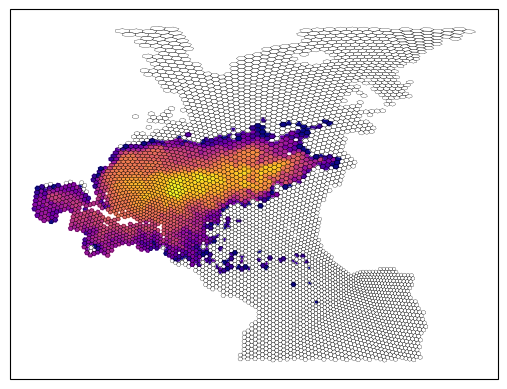

In [17]:
hexbin_grid.pcolorhex(probability[:, 1000], cmap='plasma', draw_edges=True)


In [18]:
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'
mask = xr.open_dataset(mask_file, decode_times=False)

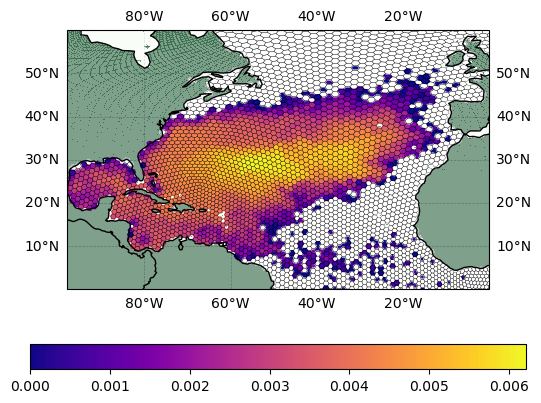

In [31]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-98, 0, 0, 60], crs=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)


im = hexbin_grid.pcolorhex(probability[:, 1300], ax=ax, cmap='plasma', draw_edges=True)
# add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')

In [20]:
def entropy(Pdf):
    Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log(Pdf_safe))

def kullback_leibler(P, Q):
    P = P / np.nansum(P)  # Normalize P to sum to 1, ignoring NaNs
    Q = Q / np.nansum(Q)  # Normalize Q to sum to 1, ignoring NaNs
    # Replace zeros in P and Q with a very small number to avoid division by zero and log(0)
    P_safe = np.where(P > 0, P, np.finfo(float).eps)
    Q_safe = np.where(Q > 0, Q, np.finfo(float).eps)
    return np.nansum(P_safe * np.log(P_safe / Q_safe))

In [26]:
ent_pset_members = np.zeros((probability.shape[1]))

for i in range(0, probability.shape[1]):
    ent_pset_members[i] = entropy(probability[:, i])


/tmp/ipykernel_620216/2068694224.py:2: RuntimeWarning: invalid value encountered in divide
  Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs


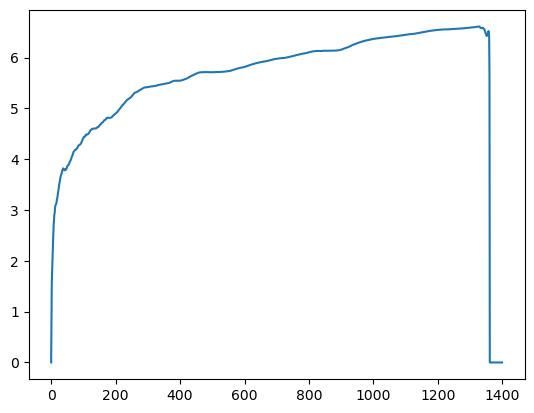

In [32]:
plt.plot(ent_pset_members)

# # Probability distributions in the Hexgrid

> Obs: We compared the trajectories of the from the moment of the release, despite the particles been released at different times. The analysis that we are performing is based in spacial variability of particle trajectories from the starting location. And we are measuring how we can increase the variability of the trajectories by doing a continous release, etc. If we compared the spacial location of the particles at the same time, despite been relaesed at different times, this will make unfair comparissons about instant position of particles in the space. This creates an unfair comparison between distributions with long release time periods over distributions with short time periods. 